**Importing libraries**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


**Loading Dataset**

In [3]:
data = pd.read_csv('/content/Data/car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Exploring Dataset**

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [15]:
data['Car_Name'].value_counts()

,count
Car_Name,
city,26
corolla altis,16
verna,14
fortuner,11
brio,10
...,...
Honda Activa 125,1
Hero Hunk,1
Hero Ignitor Disc,1


In [7]:
data['Selling_type'].value_counts()

,count
Selling_type,
Dealer,195
Individual,106


In [8]:
data['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [9]:
data['Transmission'].value_counts()

,count
Transmission,
Manual,261
Automatic,40


**Preprocessing Dataset**

In [16]:
La = LabelEncoder()
data['Fuel_Type'] = La.fit_transform(data['Fuel_Type'])
data['Selling_type'] = La.fit_transform(data['Selling_type'])
data['Transmission'] = La.fit_transform(data['Transmission'])

In [19]:
x= data.drop(['Car_Name' , 'Selling_Price'] , axis=1)
y = data['Present_Price']

In [20]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=42 , test_size=0.2)

**Loading Models**

In [22]:
LinReg = LinearRegression()
RanReg = RandomForestRegressor()

**Fitting Models**

In [26]:
RanReg.fit(x_train, y_train)


RandomForestRegressor()

In [27]:
LinReg.fit(x_train, y_train)


LinearRegression()

**Prediction**

In [30]:
y_pred_lin = LinReg.predict(x_test)
y_pred_lin

array([ 0.57 , 13.6  ,  9.4  ,  0.57 , 18.61 ,  8.92 ,  1.47 ,  0.88 ,
        0.54 ,  9.95 ,  9.83 ,  1.47 , 12.04 ,  0.51 ,  9.4  ,  4.89 ,
        1.75 , 18.64 ,  0.54 ,  1.82 ,  0.73 ,  9.4  ,  9.4  ,  4.99 ,
        0.99 ,  6.79 ,  9.9  ,  5.71 ,  1.47 ,  1.5  ,  0.787, 14.   ,
        0.95 ,  7.15 , 10.79 ,  7.   , 14.68 , 18.61 ,  4.41 , 18.54 ,
       13.7  , 12.35 ,  6.4  ,  0.81 ,  8.61 ,  1.2  , 13.6  , 22.83 ,
        4.6  ,  6.79 ,  9.4  ,  1.47 , 35.96 , 25.39 ,  9.4  , 13.6  ,
        5.7  , 11.6  ,  7.6  ,  8.5  ,  0.58 ])

In [31]:
y_pred_rf = RanReg.predict(x_test)
y_pred_rf

array([ 0.5703 , 13.531  ,  9.4126 ,  0.5716 , 18.8612 ,  8.882  ,
        1.4688 ,  0.86808,  0.541  ,  9.9717 ,  9.9534 ,  1.461  ,
       11.9954 ,  0.5126 ,  9.4126 ,  4.9205 ,  1.7687 , 18.9102 ,
        0.5411 ,  1.7805 ,  0.72221,  9.4033 ,  9.4112 ,  4.9171 ,
        0.9909 ,  6.7913 ,  9.9077 ,  5.6679 ,  1.4825 ,  1.4727 ,
        0.78903, 13.65   ,  0.9503 ,  7.165  , 10.8306 ,  7.012  ,
       15.078  , 18.9382 ,  4.4753 , 18.9698 , 13.6878 , 12.4708 ,
        6.4658 ,  0.80744,  8.6541 ,  1.1798 , 13.5958 , 22.9371 ,
        4.5847 ,  6.7895 ,  9.3662 ,  1.4806 , 35.1094 , 24.623  ,
        9.4112 , 13.6119 ,  5.6998 , 11.3892 ,  7.576  ,  8.4209 ,
        0.5772 ])

**Evaluation**

In [32]:
print("Linear Regression R2:", r2_score(y_test, y_pred_lin))
print("Random Forest Regression R2:", r2_score(y_test, y_pred_rf))

Linear Regression R2: 1.0
Random Forest Regression R2: 0.9993014978071216


In [40]:
mse_rf = mean_squared_error(y_test , y_pred_rf)
mse_lin = mean_squared_error(y_test , y_pred_lin)
print("Random Forest Regression MSE : " , mse_rf)
print("Linear Regression MSE : " , mse_lin)

Random Forest Regression MSE :  0.03523012303278444
Linear Regression MSE :  5.518962535871511e-23


**It seems like we have problem with linear regression model**

In [43]:
pred_df=pd.DataFrame({'Actual Price':y_test,'Predicted Price':y_pred_rf,'Difference':y_test-y_pred_lin})
pred_df


,Actual Price,Predicted Price,Difference
177,0.57,0.5703,5.795364e-12
289,13.60,13.5310,4.265033e-12
228,9.40,9.4126,-2.772893e-12
198,0.57,0.5716,-8.354317e-12
60,18.61,18.8612,-1.925571e-12
...,...,...,...
234,5.70,5.6998,6.172840e-13
296,11.60,11.3892,6.709300e-12
281,7.60,7.5760,-2.212275e-11
285,8.50,8.4209,4.757084e-12


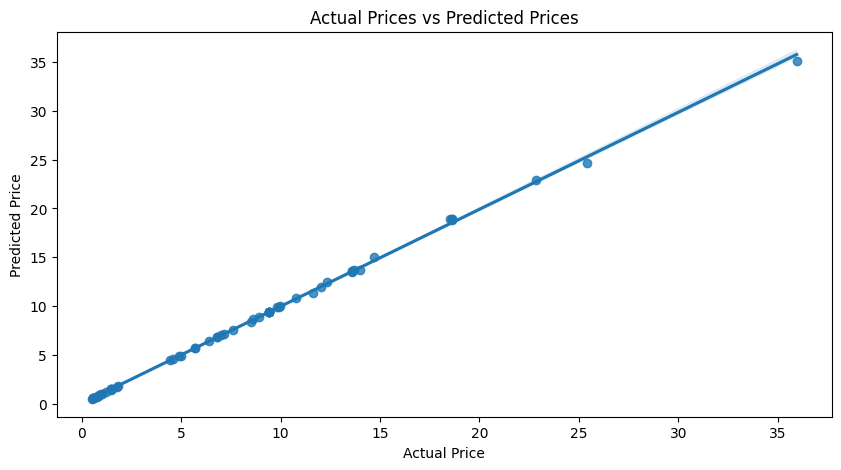

In [44]:
# Create plot
plt.figure(figsize=(10, 5))
sns.regplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()
